<a href="https://colab.research.google.com/github/ark1st/2020_AI/blob/master/num_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)


Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decord_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decord_review



1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly ? was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story wa

In [0]:
def Vectorize_Sequence(sequences, dimension = 5000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

x_train = Vectorize_Sequence(train_data)
x_test = Vectorize_Sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [0]:
from keras import models
from keras import layers


In [0]:
history_dict_list=[]
for i in range(1):
    print(i)
    model = models.Sequential()
    model.add(layers.Dense(16, activation ='relu', input_shape = (5000,)))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #트레인, 테스트 셋 생성
    x_val = x_train[:5000]
    partial_x_train = x_train[5000:]
    y_val = y_train[:5000]
    partial_y_train = y_train[5000:]
    
    #모델 컴파일
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
    
    #모델 훈련
    history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
    
    history_dict = history.history
    history_dict_list.append(history_dict) 

    


0
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 1s 48us/step - loss: 0.5042 - acc: 0.7849 - val_loss: 0.3801 - val_acc: 0.8650
Epoch 2/20
20000/20000 [==============================] - 1s 43us/step - loss: 0.3145 - acc: 0.8906 - val_loss: 0.3166 - val_acc: 0.8752
Epoch 3/20
20000/20000 [==============================] - 1s 43us/step - loss: 0.2498 - acc: 0.9103 - val_loss: 0.2875 - val_acc: 0.8842
Epoch 4/20
20000/20000 [==============================] - 1s 43us/step - loss: 0.2170 - acc: 0.9199 - val_loss: 0.2811 - val_acc: 0.8868
Epoch 5/20
20000/20000 [==============================] - 1s 44us/step - loss: 0.1924 - acc: 0.9306 - val_loss: 0.2800 - val_acc: 0.8878
Epoch 6/20
20000/20000 [==============================] - 1s 44us/step - loss: 0.1780 - acc: 0.9345 - val_loss: 0.2921 - val_acc: 0.8888
Epoch 7/20
20000/20000 [==============================] - 1s 43us/step - loss: 0.1637 - acc: 0.9405 - val_loss: 0.2979 - val_ac

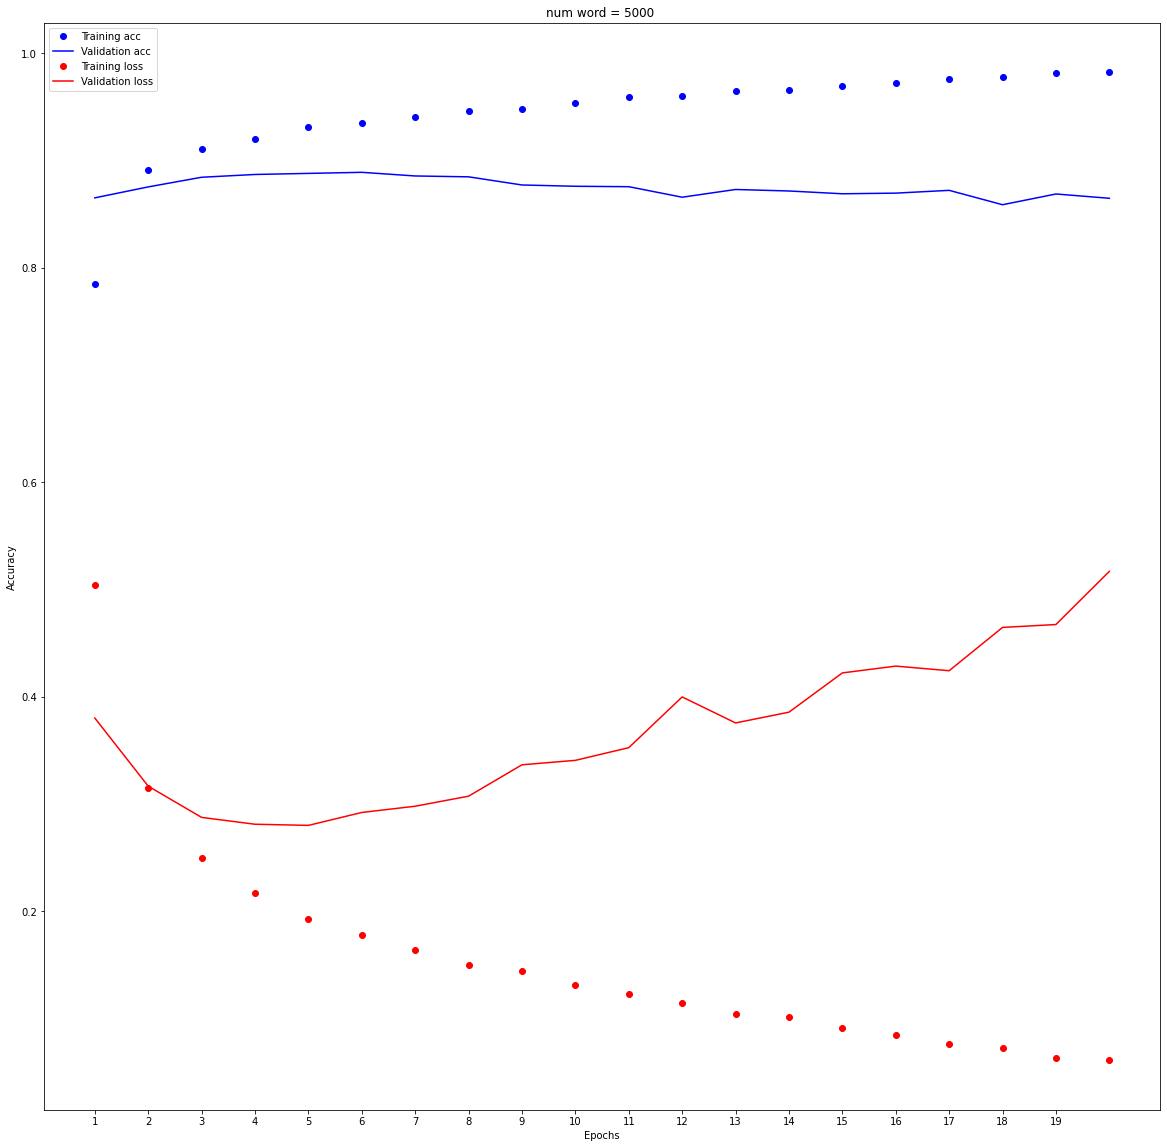

In [0]:
i=0
plt.figure(figsize=(20,20))
for history_dict in history_dict_list:
  loss = history_dict['loss']
  val_loss = history_dict['val_loss']
    
  epochs = range(1, len(loss) + 1)

  acc = history_dict['acc']
  val_acc = history_dict['val_acc']
    
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.plot(epochs, loss, 'ro', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('num word = 5000 ')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.xticks([x for x in range(1,20)])
  plt.legend()
  i = i+1
plt.show()  





